In [1]:
from data_loader import ObjectSegmentationDataset, weak_augment, denormalize, strong_augment
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
ds = ObjectSegmentationDataset(r"D:\Datasets\dino_seg\train")
dl = DataLoader(ds, batch_size=4)
batch = next(iter(dl))
images, masks = batch

tensor(0.3182)
tensor(0.3952)
tensor(0.1189)
tensor(0.1472)
tensor(0.2078)


In [2]:
def show_batch(images, masks):
    masked = images*masks
    for n, im in enumerate(masked):
        plt.subplot(121)
        plt.imshow(images[n].permute((1,2,0)))
        plt.subplot(122)
        plt.imshow(im.permute((1,2,0)))
        plt.show()

# WEAK 

In [12]:
masks.mean(dim=(2,3))

tensor([[0.3182],
        [0.3952],
        [0.1472],
        [0.2078]])

In [3]:
images_aug, masks_aug = weak_augment(images, masks)
images_aug = denormalize(images_aug)

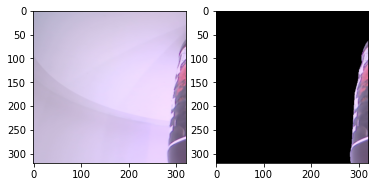

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


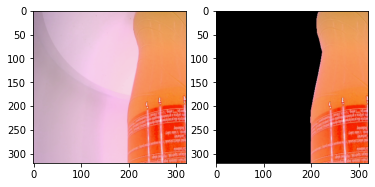

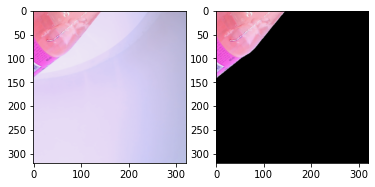

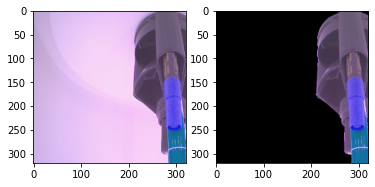

In [4]:
show_batch(images_aug, masks_aug)

# STRONG

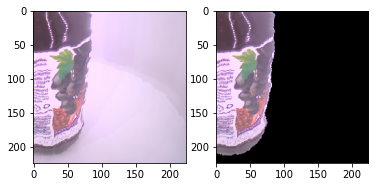

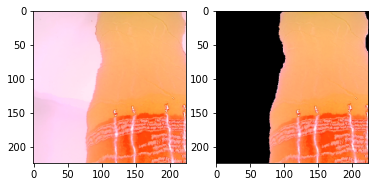

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


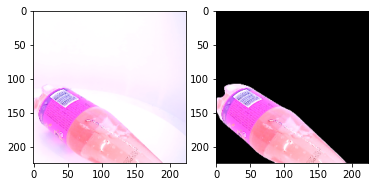

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


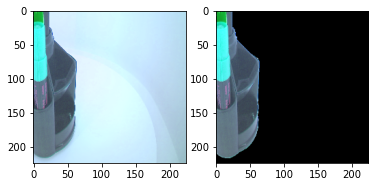

In [5]:
images_aug, masks_aug = strong_augment(images, masks)
images_aug = denormalize(images_aug)
show_batch(images_aug, masks_aug)

# Kalkulowanie wagi
Aby poprawić estymację brzegu ustalimy sobie wagę dla obszarów w okolicy brzegów

In [6]:
from kornia.morphology import dilation, erosion
import matplotlib as mpl
import torch

def calculate_borders(masks, border_size: int):
    eroded_masks = erosion(masks, kernel=torch.ones((border_size, border_size)))
    borders = masks-eroded_masks
    return borders-1

def calculate_weights(masks, border_weight: float=0.33):
    borders = calculate_borders(masks)
    weights = torch.ones_like(borders)
    weights[borders>0.9] = border_weight
    return weights

weights = calculate_weights(masks, 0.7)
for mask, weight in zip(masks, weights):
    plt.imshow(mask[0])
    plt.show()
    plt.imshow(weight[0], norm=mpl.colors.Normalize(vmin=0, vmax=1), cmap="gray")
    plt.show()

TypeError: calculate_borders() missing 1 required positional argument: 'border_size'

In [7]:
a = torch.zeros((100, 100))

In [10]:
a[:, 10:20] = 1

In [11]:
a.mean()

tensor(0.1000)